# **Summary**
 명확한 기준이 있는 미세먼지,시간대, 비를 중점으로 분석했습니다.
 결론적으로
 * **미세먼지**
 
 초미세먼지는 나쁨, 미세먼지는 보통일때 따릉이 사용량이 많음. 
 * **시간**

 17,18,19시에 사용량이 전체 사용량에 25%를 차지함. 그리고 오전 8시에 갑작스레 사용량이 2.9% 상승함.(등교, 퇴근 등에 인한 걸로 예상됨)
 * **비**
 
 비가 안온시간과 온 시간 비율이 97:3으로 비가 온 시간에 대한 데이터가 부족함. 그리고 시간당 비가 왔을때 사용량이 안 온 시간 사용량보다 높음.

# **Import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('./train.csv')

# **분석**

In [ ]:
pm=['hour_bef_pm10','hour_bef_pm2.5']

#정렬 순서
pm_order=[
    'good',
    'not bad',
    'bad',
    'very bad'
]
#미세먼지 수치에 매우 나쁨(very bad), 나쁨(bad), 보통(not bad), 좋음(good)으로 바꿉니다
for pm_i in pm:
  df[pm_i] = df[pm_i].apply(lambda x : 'very bad' if x >=76 else 'bad' if x>=36 else 'not bad' if x>=16 else 'good')

In [ ]:
#pm_order 순으로
pm_2 = df['hour_bef_pm2.5'].value_counts()[pm_order]
pm_10 = df['hour_bef_pm10'].value_counts()[pm_order]
print(pm_2)
print(pm_10)

good        233
not bad     850
bad         358
very bad     18
Name: hour_bef_pm2.5, dtype: int64
good         95
not bad     332
bad         779
very bad    253
Name: hour_bef_pm10, dtype: int64


In [ ]:
#미세먼지나쁜 순서대로 따릉이 사용량 구하기 0은 미세먼지 1은 초미세먼지

pm10_total=pd.DataFrame()
pm2_total=pd.DataFrame()


for pm_i in pm:
  for col in pm_order:
    if pm_i=='hour_bef_pm10':
      pm10_total[str(col)]=[int(df[df[pm_i]==col]['count'].sum())]
    else:
      pm2_total[str(col)]=[int(df[df[pm_i]==col]['count'].sum())]
pm2_total=pm2_total.transpose()[0][pm_order]
pm10_total=pm10_total.transpose()[0][pm_order]      

# **따릉이 컬러**
따릉이 색깔을 표에 적용했습니다. 코드는 아래와 같습니다.

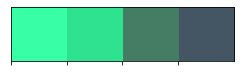

In [ ]:
#따릉이 색깔
sns.palplot(['#38FFA5','#2FE290','#447D64', '#445664'])
original_color=['#38FFA5','#2FE290','#447D64', '#445664']

# **미세먼지**
제 예상으로는 미세먼지 **좋음** 혹은 **보통**일때 가장 사용량이 많을 거라 생각했습니다. 
실제로 미세먼지는 **보통**인 경우에 사용량이 가장 많습니다. 하지만 초미세먼지는 **나쁨**일 때 가장 사용량이 많습니다.

이 결과에 의문이 생깁니다. 아마도 데이터셋에 초미세먼지 **나쁨**인 데이터가 **보통**인 데이터보다 많아서라고 생각이 들었습니다. 그래서 아래에 heatmap으로 분석해보겠습니다.

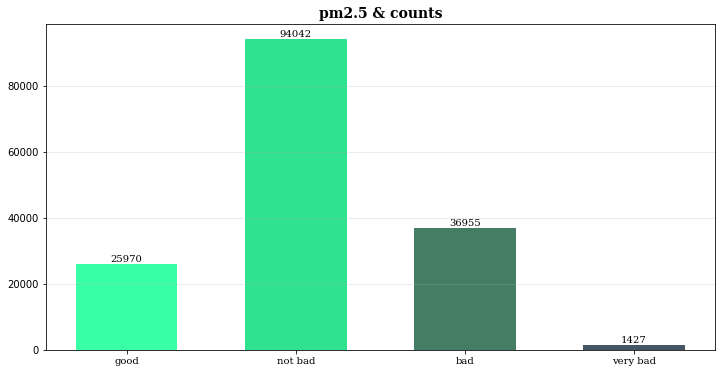

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
for i,color in enumerate(original_color):
  ax.bar(pm2_total.index[i], pm2_total[i], width=0.60, 
        color=color)

for i in pm2_total.index:
    ax.annotate(f"{pm2_total[i]}", 
                   xy=(i, pm2_total[i]+1500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=10,
                   color='black')

ax.set_xticklabels(pm2_total.index, fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.3)    
ax.set_title('pm2.5 & counts',fontsize=14,fontweight='bold',fontfamily='serif')
plt.show()

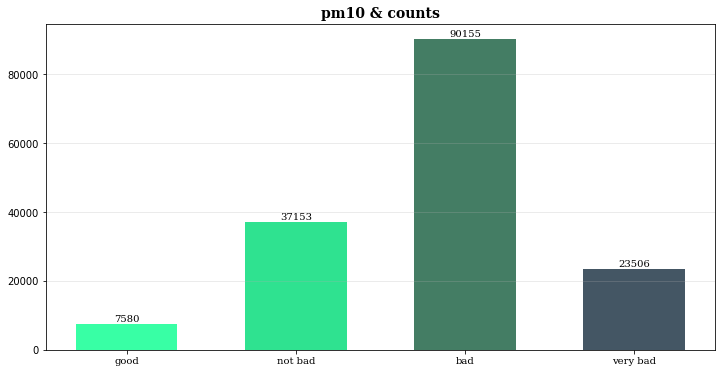

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))

for i,color in enumerate(original_color):
  ax.bar(pm10_total.index[i], pm10_total[i], width=0.60, 
        color=color)

for i in pm10_total.index:
    ax.annotate(f"{pm10_total[i]}", 
                   xy=(i, pm10_total[i]+1500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=10,
                   color='black')

ax.set_xticklabels(pm10_total.index, fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.3)    
ax.set_title('pm10 & counts',fontsize=14,fontweight='bold',fontfamily='serif')
plt.show()

 초미세먼지와 미세먼지가 같은 경우의 수를 heatmap으로 표현했습니다. 하지만 초미세먼지가 **보통**인 경우가 **나쁨**인 경우가 많았습니다. 그러므로 초미세먼지가 **나쁨**일때 사용량이 높다는 결론을 낼 수 있었습니다. 

왜 이런 결과가 나왔는지는 정확히 잘 모르겠습니다. 아마 행사 같은 게 있지 않았을까? 라는 의문이 듭니다.

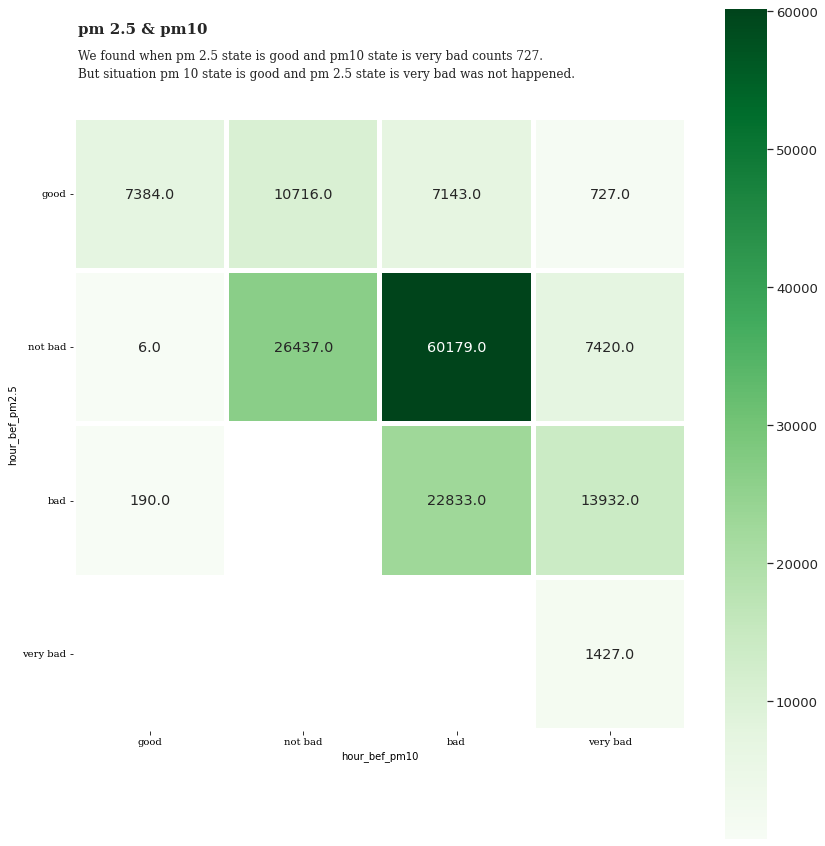

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.set(font_scale=1.2)
sns.heatmap(df.pivot_table(values='count', index=['hour_bef_pm2.5'], columns=['hour_bef_pm10'], aggfunc=np.sum).loc[pm_order,pm_order],
            cmap="Greens",
            square=True, 
            linewidth=4, 
            ax=ax,
            annot=True,
            fmt=".1f",
           )


fig.text(0.1, 0.95, 'pm 2.5 & pm10', fontweight='bold', fontfamily='serif', fontsize=15)   
fig.text(0.1, 0.92, 
"We found when pm 2.5 state is good and pm10 state is very bad counts 727."
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.1, 0.90, 
"But situation pm 10 state is good and pm 2.5 state is very bad was not happened."
, fontsize=12, fontweight='light', fontfamily='serif')
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', fontsize=10)

plt.tight_layout()
plt.show()

# **시간대별로 사용자수**

In [ ]:
#시간대별 따릉이 이용수
hour_total=pd.DataFrame()
hours=[i for i in range(24)]
for hour in hours:
  hour_total[str(hour)]=[int((df[df['hour']==hour]['count']).sum())]
hour_total=hour_total.transpose()[0]

In [ ]:
#시간 분포가 정확한지
hour_dist=pd.DataFrame()
for hour in hours:
  hour_dist[str(hour)]=[int((df[df['hour']==hour]['hour']).count())]
hour_dist=hour_dist.transpose()[0]

일단 기본적으로 0~23시가 균등하게 데이터가 있는지 알아봤습니다. 아래 표를 보신다면 균등하게 61, 60개의 데이터가 각각 있는 것을 확인 할 수 있습니다.

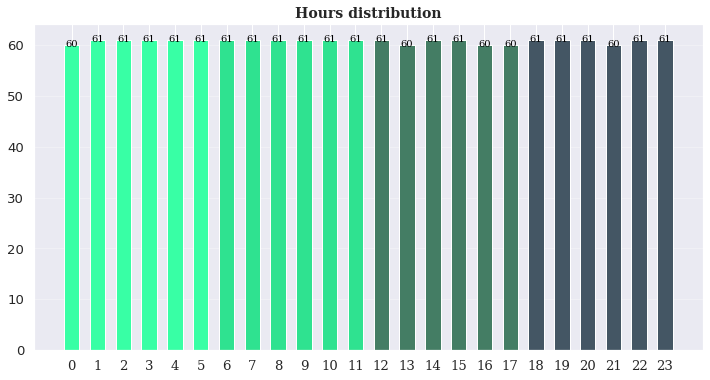

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
color_num=0
for i in range(24):
  if i%6==0 and i!=0:
    color_num+=1
  ax.bar(hour_dist.index[i], hour_dist[i], width=0.60, 
        color=original_color[color_num])

for i in hour_dist.index:
    ax.annotate(f"{hour_dist[i]}", 
                   xy=(i, hour_dist[i]),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=10,
                   color='black')

ax.set_xticklabels(hour_dist.index, fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.3)    
ax.set_title('Hours distribution',fontsize=14,fontweight='bold',fontfamily='serif')
plt.show()

그렇다면 어떤 시간대에 따릉이 사용량이 많을지 알아보겠습니다. 밑에 pie chart를 보신다면 확인 할 수 있습니다. 17, 18, 19시에 전체 사용량에 25%를 차지합니다. 반면 1시부터 5시까지 사용자는 적습니다.

하지만 신기한 점은 8시입니다. 8시에 갑작스레 사용량이 7시에 비해 2.9% 상승합니다. 아마도 8시에 출근 혹은 등교가 겹쳐서 일어난 결과라는 생각이 듭니다.

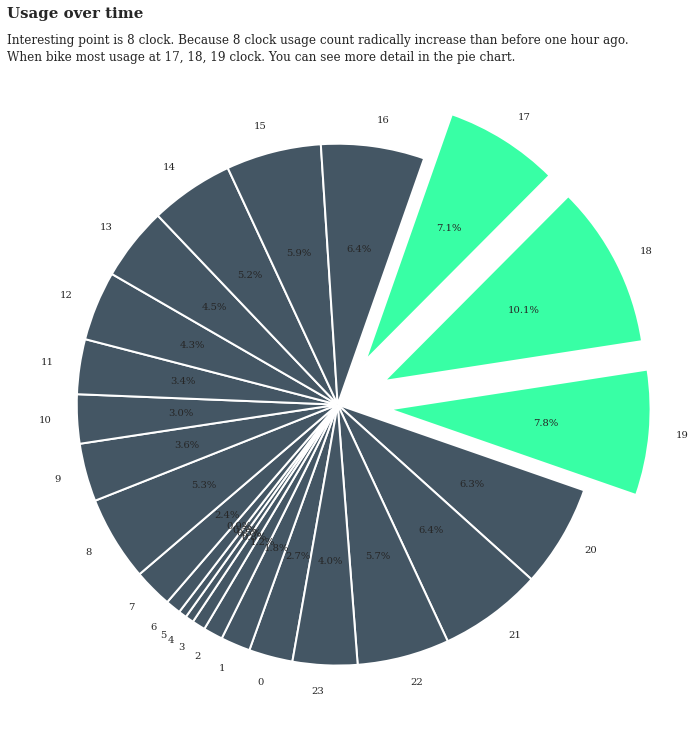

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ratio = []
explode = [0.0 for i in range(24)]
explode[17]=explode[18]=explode[19]=0.2
colors=['#445664' for i in range(24)]
colors[17]=colors[18]=colors[19]='#38FFA5'
hours=[str(i) for i in range(24)]
for ind in hour_total.index:
  ratio.append(hour_total[ind])
wedgeprops={'edgecolor': 'w', 'linewidth': 2}
textprops={'fontsize':10,'fontweight':'light', 'fontfamily':'serif'}

fig.text(0.13, 0.95, 'Usage over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.92, 
"Interesting point is 8 clock. Because 8 clock usage count radically increase than before one hour ago."
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.13, 0.90, 
"When bike most usage at 17, 18, 19 clock. You can see more detail in the pie chart."
, fontsize=12, fontweight='light', fontfamily='serif')
plt.pie(ratio,textprops=textprops, wedgeprops=wedgeprops,labels=hours, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=False, colors=colors)
plt.show()

# **비에 관한 분석**

In [ ]:
rain_1=df[df['hour_bef_precipitation']==1.0]['hour_bef_precipitation'].count()
rain_0=df[df['hour_bef_precipitation']==0.0]['hour_bef_precipitation'].count()

일단 비가 온시간과 비가 안온 시간을 알아보겠습니다. 비가 온시간은 46시간, 안온 시간은 1411시간입니다.

비가 온시간은 전체 3%를 차지하고 안온 시간은 97%를 차지합니다. 즉 비가 안온 시간이 데이터에 높은 비중을 차지하고 있습니다.

하지만 [Climate index](https://globalresidenceindex.com/hnwi-index/climate-index/)를 확인해보신다면 서울에 비가 온 날은 135일로 33%를 차지합니다. 데이터에서는 전체 3%를 차지하고 있으니 데이터에서 비가 온날에 대한 데이터가 부족하다는 생각이 들지만 비가 하루종일 오지 않기도 하고 잠깐 내린것도 온날로 둡니다. 참고만 하면 좋습니다.

그리고 가설을 세워보자면 비가 온 시간에 따릉이 사용자가 적을 것입니다. 그리고 비가 안온 시간에는 사용자가 많을 거라 생각합니다. 그렇기에 현재 시간 비율은 97:3이지만 실제 사용량은 98:2 혹은 99:1 정도 될거라 예상합니다.

In [ ]:
print(f'비가 온 시간 : {rain_1} 비가 안온 시간 : {rain_0}')

비가 온 시간 : 46 비가 안온 시간 : 1411


In [ ]:
#시간대별 따릉이 이용수
rain_total=pd.DataFrame()
states=['clean','rainy']
total=0
for i,state in enumerate(states):
  if i==0:
    total+=int((df[df['hour_bef_precipitation']==i]['count']).sum())/rain_0
  else:
    total+=int((df[df['hour_bef_precipitation']==i]['count']).sum())/rain_1
for i,state in enumerate(states):
  if i==0:
    rain_total[str(state)]=[round((int((df[df['hour_bef_precipitation']==i]['count']).sum())/rain_0)/total,1)]
  else:
    rain_total[str(state)]=[round((int((df[df['hour_bef_precipitation']==i]['count']).sum())/rain_1)/total,1)]
    
rain_total=rain_total.transpose()[0]

신기하게도 가설과 다르게 전체 사용량 중 비가 안온날 사용량이 80% 비가 온날은 20%입니다. 이상하게도 비가 온날에 사용량이 많은 것을 확인 할 수 있습니다.   

> 개인적으로 사용자 카운트 기준이 실시간 사용자수가 아니라 당장 반납자 수를 기준으로 한다면 가능하다는 생각이 들었습니다

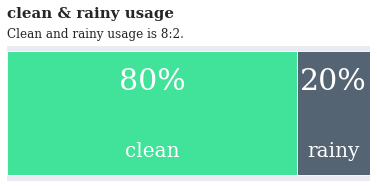

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(0.7, rain_total['clean'], 
        color=original_color[1], alpha=0.9, label='clean')
ax.barh(0.7, rain_total['rainy'], left=rain_total['clean'], 
        color=original_color[-1], alpha=0.9, label='rainy')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(rain_total.index, fontfamily='serif', fontsize=11)


# clean percentage
ax.annotate(f"{int(rain_total['clean']*100)}%", 
                   xy=(rain_total['clean']/2,0.9),
                   va = 'center', ha='center',fontsize=30, 
                   fontweight='light', fontfamily='serif',
                   color='white')

ax.annotate("clean", 
                   xy=(rain_total['clean']/2, 0.45),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')
    
    
ax.annotate(f"{int(rain_total['rainy']*100)}%", 
                   xy=(rain_total['clean']+rain_total['rainy']/2, 0.9),
                   va = 'center', ha='center',fontsize=30
                   , fontweight='light', fontfamily='serif',
                   color='white')
ax.annotate("rainy", 
                   xy=(rain_total['clean']+rain_total['rainy']/2, 0.45),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'clean & rainy usage', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'Clean and rainy usage is 8:2.',fontfamily='serif',fontsize=12)  

for s in [
  'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

# 결론
결론적으로 제가 예상한 거와 다르게 분석이 된 게 많습니다.

1. 초미세먼지가 나쁨일때 사용자 수가 많습니다.
2. 시간대에서 8시에 갑자기 사용량이 높아집니다.
3. 비가 온날에 사용량이 높습니다.

표면적으로만 분석했습니다. 이외에도 다양한 데이터가 있으니 추가적으로 분석하여 좋은 결과를 낼 수 있다고 생각합니다.